# Introduction to relational plots & subplots (Seaborn) — Jupyter Notebook ready notes


---

# 1 — What are *relational plots*?

* **Short summary:** Relational plots show the relationship between two quantitative variables (e.g., `total_bill` vs `tip`). Seaborn calls these *relational plots* because they visualize relationships.
* **Why it matters:** Many data-science questions ask about relationships (e.g., "do taller people weigh more?", "how does GDP relate to literacy?"). Relational plots are the go-to visual tool for those questions.

---

# 2 — Example questions (from the transcript)

* Do taller people tend to weigh more?
* What's the relationship between number of absences and final grade?
* How does a country's GDP relate to literacy rate?

These are all two-variable relationship questions and are appropriately visualized with scatterplots or lineplots (both are kinds of relational plots).

---

# 3 — Visualizing subgroups

* One approach: use `hue` (different colors on the same axes) to show subgroups.
* Another approach (focus of this lesson): **create separate plots for each subgroup** — done with `sns.relplot()` (returns a FacetGrid) which easily produces subplots for categories.

---

# 4 — Load the example dataset (`tips`) used in slides

```python
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset used in examples
tips = sns.load_dataset("tips")
```

**Expected output (textual):**

```
No textual output; dataset 'tips' is loaded into the variable `tips`.
`tips` is a pandas.DataFrame with columns like:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
```

**Line-by-line explanation**

* `import seaborn as sns`

  * **What:** Imports the Seaborn library and gives it alias `sns`.
  * **Why:** We'll use Seaborn functions like `relplot()` and `scatterplot()`.
  * **Expected result:** `sns` is available in the namespace.

* `import matplotlib.pyplot as plt`

  * **What:** Imports Matplotlib's pyplot module as `plt`.
  * **Why:** `plt.show()` is used to render figures in many environments (including Jupyter).
  * **Expected result:** `plt` available for figure control.

* `tips = sns.load_dataset("tips")`

  * **What:** Loads the example `tips` dataset (bundled with Seaborn) into a DataFrame named `tips`.
  * **Why:** Example dataset used in the slides — contains bill/tip info and categorical columns like `day`, `time`, `smoker`.
  * **Expected result:** `tips` is a DataFrame; you can inspect with `tips.head()`.

---

# 5 — `scatterplot()` (single plot)

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()
```
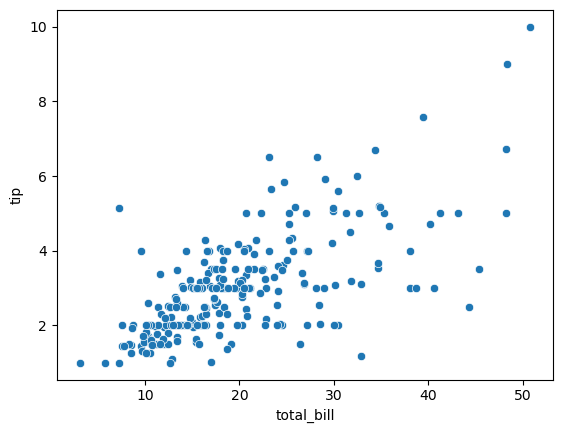
**Expected output (visual description):**

```
A single scatter plot (one Axes). 
- x-axis: total_bill (numeric)
- y-axis: tip (numeric)
- Each point: one restaurant bill observation
You will typically see more points clustered at lower bill amounts and a vague upward trend (higher bill -> larger tip) but with spread.
```

**Line-by-line explanation**

1. `import seaborn as sns`

   * Already explained above.

2. `import matplotlib.pyplot as plt`

   * Already explained above.

3. `tips = sns.load_dataset("tips")`

   * Loads the dataset used for plotting.

4. `sns.scatterplot(x="total_bill", y="tip", data=tips)`

   * **What:** Creates a scatter plot of `total_bill` (x) vs `tip` (y).
   * **Why:** To visualize the raw relationship between bill size and tip amount.
   * **Expected result:** A Matplotlib Axes is drawn with points representing each row in `tips`.

5. `plt.show()`

   * **What:** Renders the figure (useful in scripts or some notebook setups).
   * **Why:** Ensures the plotted figure is displayed inline.
   * **Expected result:** The scatter plot image is displayed.

**Significance of the output**

* Shows raw point-level relationship — useful to spot trends, outliers, and spread.
* Good for a single overall relationship, but not great to inspect subgroup differences (e.g., smokers vs non-smokers).

---

# 6 — `relplot()` as the relational plotting entry point

**Key idea from transcript:** `relplot()` stands for *relational plot* and supports both `kind="scatter"` and `kind="line"`. Importantly it returns a **FacetGrid**, which makes it easy to produce multiple subplots (one per subgroup) using parameters like `col`, `row`, `col_wrap`, `col_order`, etc. For the rest of the course, `relplot()` is preferred because of these faceting features.

---

# 7 — `relplot()` used like a scatter (`kind="scatter"`)

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")
plt.show()
```
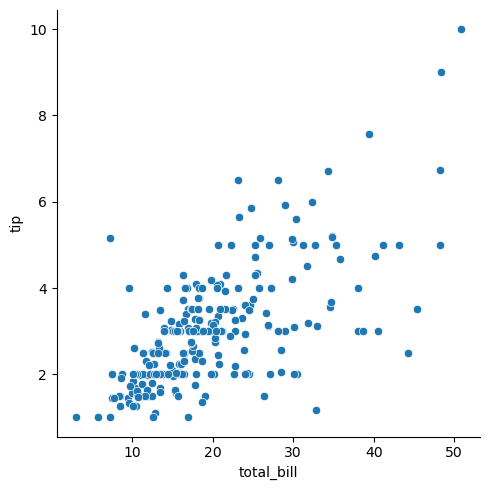


**Expected output (visual description):**

```
A single scatter plot similar to sns.scatterplot but created via relplot.
Under the hood, relplot returns a FacetGrid object with one Axes (so you can later call methods on the returned object).
```

**Line-by-line explanation**

1. `import seaborn as sns` — import Seaborn.
2. `import matplotlib.pyplot as plt` — import pyplot.
3. `tips = sns.load_dataset("tips")` — load dataset.
4. `sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")`

   * **What:** Ask Seaborn to make a relational plot of `total_bill` vs `tip` and specify the relational *kind* as `"scatter"`.
   * **Why:** Using `relplot` gives the same visual as `scatterplot` but returns a `FacetGrid`, enabling faceting options (next sections).
   * **Expected result:** A scatter figure is drawn; the function returns a `FacetGrid` instance (often captured as variable `g = sns.relplot(...)`).
5. `plt.show()` — render the plot.

**Extra note:** You can capture the returned grid:

```python
g = sns.relplot(...)
type(g)  # seaborn.axisgrid.FacetGrid
```

This allows additional customization like `g.set_axis_labels(...)` or `g.fig.suptitle(...)`.

---

# 8 — Subplots in columns: `col="smoker"`

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="smoker")
plt.show()
```
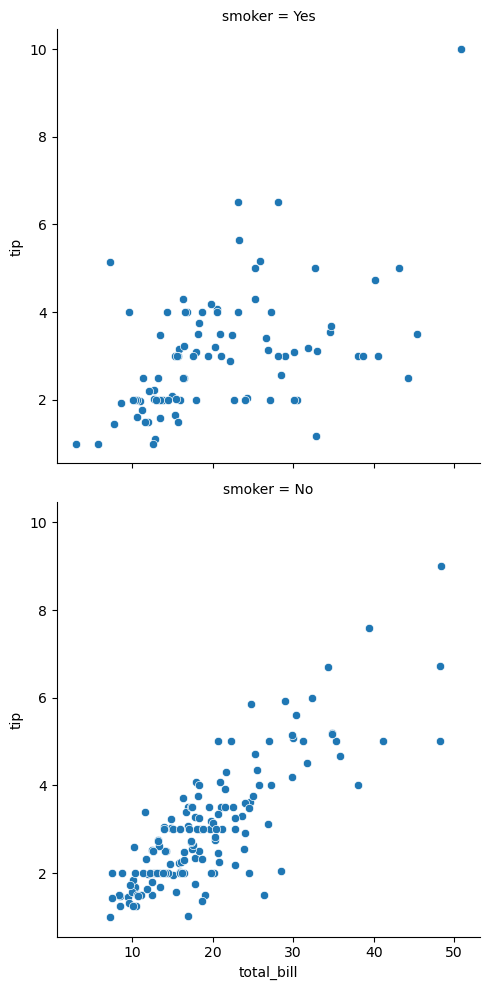


**Expected output (visual description):**

```
A figure with two subplots arranged horizontally (columns):
- Left subplot: data where smoker == 'No'
- Right subplot: data where smoker == 'Yes'

Each subplot is a scatter of total_bill vs tip for that subgroup.
```

**Line-by-line explanation**

1. `import seaborn as sns` — import Seaborn.
2. `import matplotlib.pyplot as plt` — import pyplot.
3. `tips = sns.load_dataset("tips")` — load dataset.
4. `g = sns.relplot(..., col="smoker")`

   * **What:** Create a relational plot faceted by the `smoker` column: one column per unique `smoker` value.
   * **Why:** To compare the relationship between `total_bill` and `tip` separately for smokers and non-smokers.
   * **Expected result:** `g` is a `FacetGrid` containing two Axes side-by-side. Each Axes shows only rows where `smoker` equals that facet value (e.g., `'Yes'` or `'No'`).
5. `plt.show()` — renders the grid.

**Significance of the output**

* Allows visual comparison: are patterns (slope, spread, outliers) different between smokers and non-smokers?

---

# 9 — Subplots in rows: `row="smoker"`

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", row="smoker")
plt.show()
```
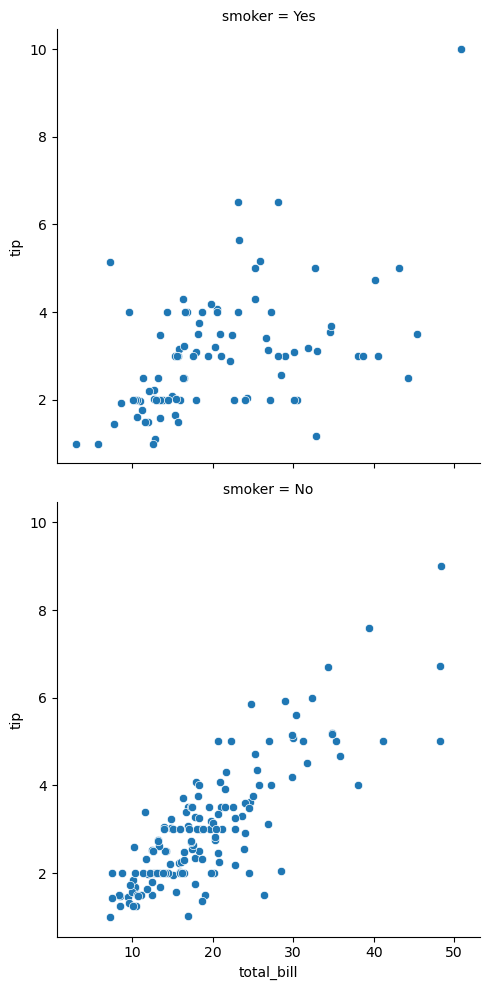


**Expected output (visual description):**

```
A figure with two subplots arranged vertically (rows):
- Top: smoker == 'No' (or one order depending on value ordering)
- Bottom: smoker == 'Yes'
Each subplot: scatter of total_bill vs tip for that subgroup.
```

**Line-by-line explanation**
1–3. (imports and load) — same as previous examples.
4\. `g = sns.relplot(..., row="smoker")`

* **What:** Facet by `smoker` but arrange facets vertically (one facet per row).
* **Why:** Vertical layout may be better for narrow display areas or preferred comparison style.
* **Expected result:** A `FacetGrid` with rows corresponding to `smoker` categories.

5. `plt.show()` — render.

**Significance**

* Same idea as `col` but different layout. Choose `row` vs `col` based on display or readability.

---

# 10 — Subplots in rows *and* columns: `col="smoker", row="time"`

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="smoker",
    row="time"
)
plt.show()
```
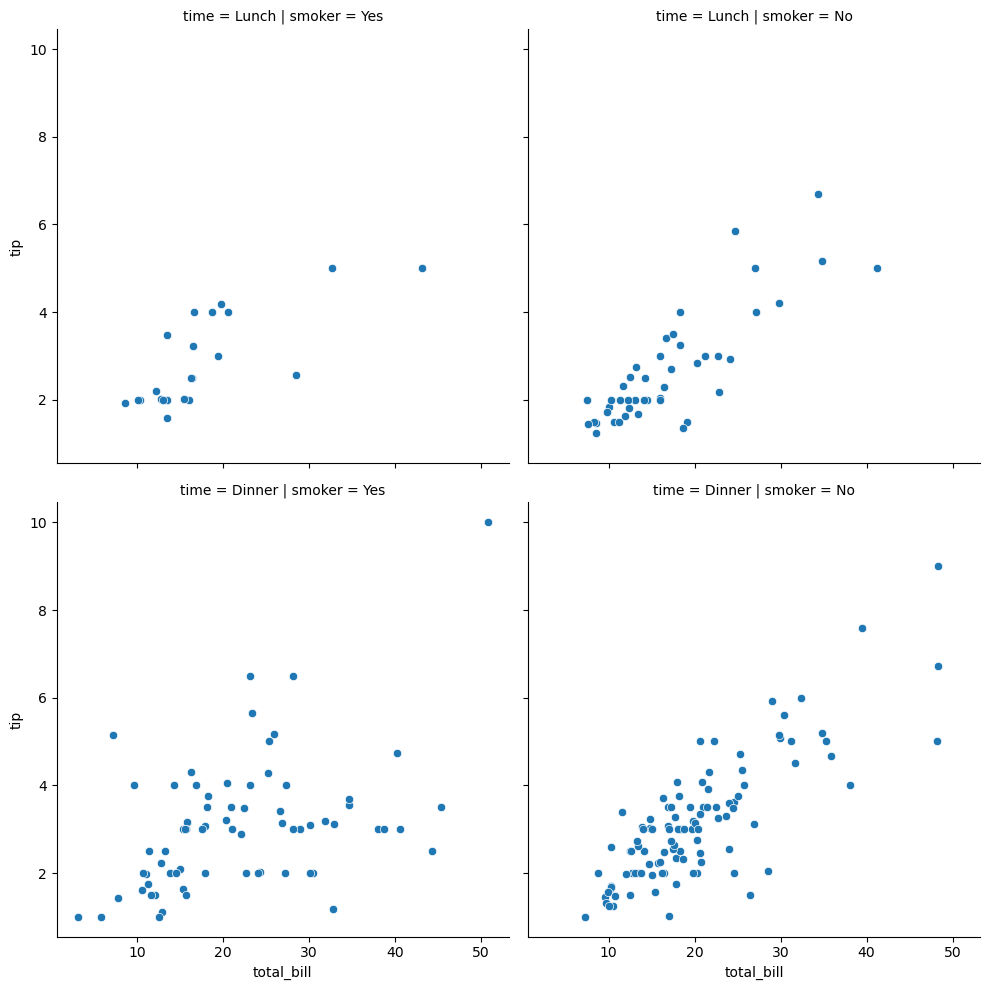


**Expected output (visual description):**

```
A grid of subplots where:
- Columns split by smoker status (e.g., 'No', 'Yes')
- Rows split by time of day (e.g., 'Lunch', 'Dinner')
So there will be one subplot for each combination (smoker × time), for a total of up to 4 subplots (2 × 2).
Each subplot contains points filtered for that combination (e.g., smokers at dinner).
```

**Line-by-line explanation**
1–3. (imports and load)
4\. `g = sns.relplot(..., col="smoker", row="time")`

* **What:** Create a 2D faceted grid: columns for `smoker` categories and rows for `time` categories.
* **Why:** To inspect how the `total_bill` vs `tip` relationship varies across both smoking status and time (Lunch/Dinner).
* **Expected result:** Up to `n_smoker * n_time` subplots; each subplot uses only rows matching that combination.

5. `plt.show()` — render.

**Significance**

* Very useful when the interaction of two categorical variables on the relationship of interest is suspected.

---

# 11 — Subgroups for days of the week (many columns) and `col_wrap`

**Transcript idea:** There are four days (`Thur`, `Fri`, `Sat`, `Sun`). Arranging all four horizontally may be wide, so `col_wrap` controls how many facets per row.

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="day",
    col_wrap=2  # wrap into 2 columns per row
)
plt.show()
```
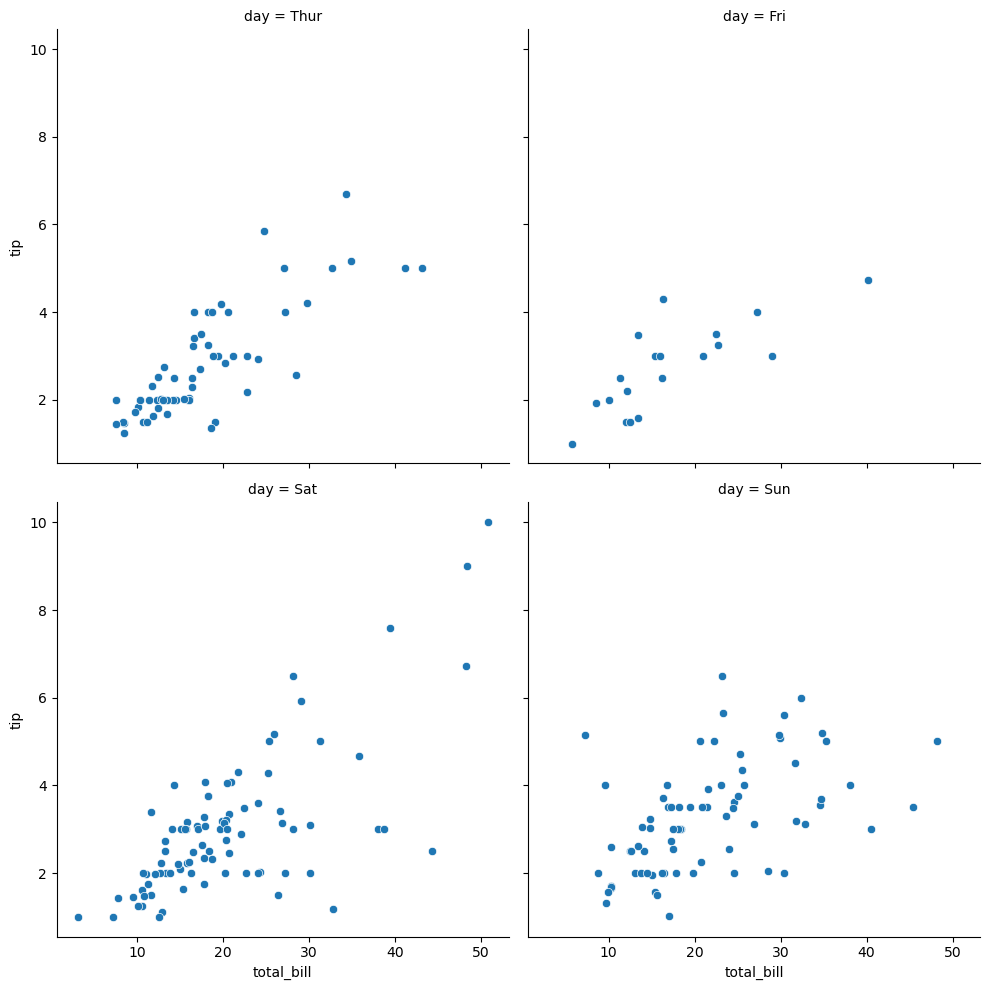

**Expected output (visual description):**

```
Four subplots, wrapped into rows with 2 columns each:
Row 1: facets for first two day categories (e.g., 'Thur', 'Fri')
Row 2: facets for the remaining days (e.g., 'Sat', 'Sun')
Each facet is the scatter for that day.
```

**Line-by-line explanation**
1–3. imports/load.
4\. `g = sns.relplot(..., col="day", col_wrap=2)`

* **What:** Facet the plot by the `day` column, but limit each row to 2 facets. After 2 facets the next facet begins a new row.
* **Why:** Improves readability when there are many facet categories and a single long row would be crowded or require horizontal scrolling.
* **Expected result:** A wrapped grid; easier viewing on standard screens.

5. `plt.show()` — render.

**Significance**

* `col_wrap` is a convenient layout control to keep facet grids tidy.

---

# 12 — Ordering columns (and rows) with `col_order` / `row_order`

**From the slide transcript:** You can specify the order of facets with `col_order` or `row_order`. Example ordering: `["Thur", "Fri", "Sat", "Sun"]`.

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="day",
    col_wrap=2,
    col_order=["Thur", "Fri", "Sat", "Sun"]
)
plt.show()
```
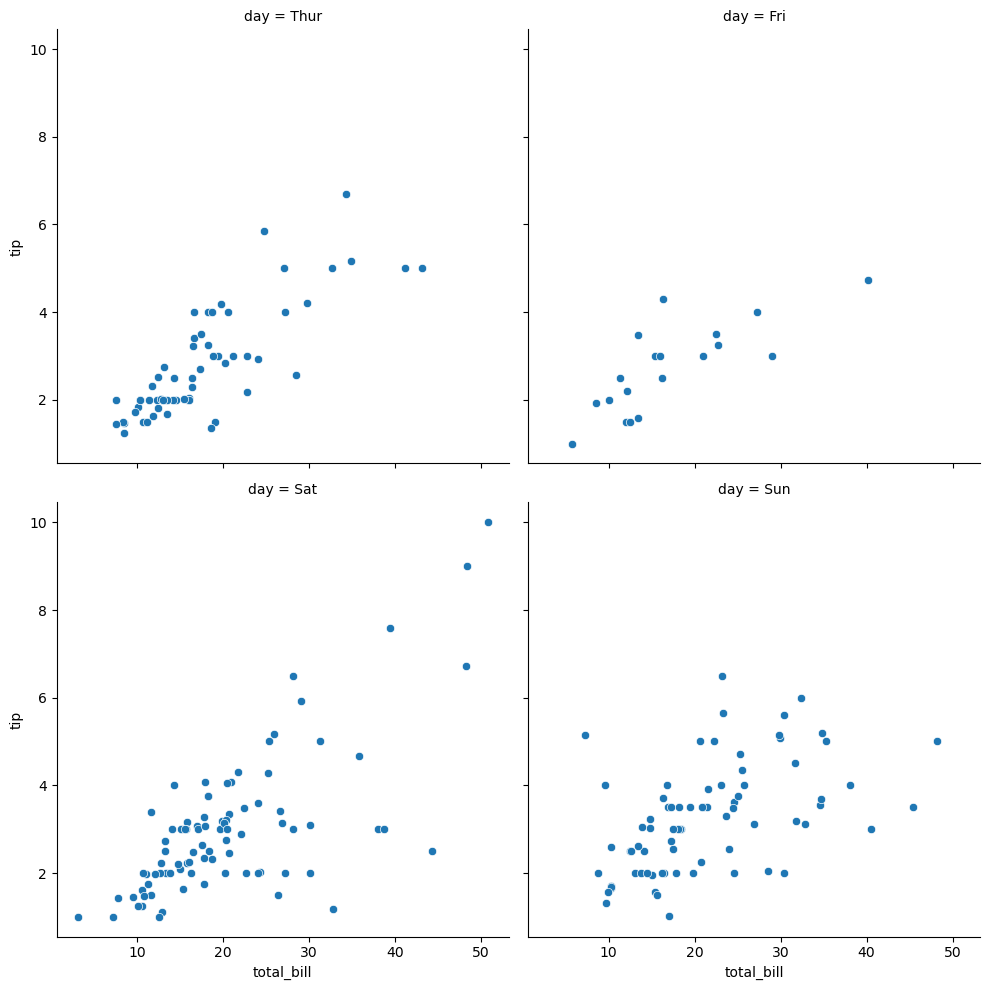


**Expected output (visual description):**

```
Four subplots arranged in two columns:
- The facet order follows the specified list: Thur → Fri → Sat → Sun.
- Wrapping still respects col_wrap=2, so rows are: [Thur, Fri] then [Sat, Sun].
```

**Line-by-line explanation**
1–3. imports & load.
4\. `g = sns.relplot(..., col_order=["Thur","Fri","Sat","Sun"])`

* **What:** Explicitly define the order of categorical values for the column facets.
* **Why:** By default, categorical order may be alphabetical or dataset order; if you want a logical order (e.g., chronological days), supply `col_order`.
* **Expected result:** Facets appear in the exact order provided.

5. `plt.show()` — render.

**Significance**

* Critical when category order matters for interpretation (e.g., days, months, ordered bins).

---

# 13 — Putting it together: when to use what

* Use `sns.scatterplot()` for a single quick scatter.
* Prefer `sns.relplot(kind="scatter")` when you may want to facet (use `col`, `row`, `col_wrap`, `col_order`, `row_order`) — `relplot` returns a `FacetGrid` which is powerful for small multiples.
* `hue` vs `col`/`row`:

  * `hue` draws subgroups in a single Axes (different colors). Good for compact comparison.
  * `col`/`row` creates separate plots (facets) for each subgroup, making individual subgroup patterns easier to read.

---

# 14 — Example: capture the FacetGrid and customize labels

**Code**

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="smoker"
)

# Customize labels and title on the returned FacetGrid
g.set_axis_labels("Total bill (USD)", "Tip (USD)")
g.fig.suptitle("Tip vs Total bill by smoker status", y=1.02)  # y raises the suptitle so it doesn't overlap
plt.show()
```

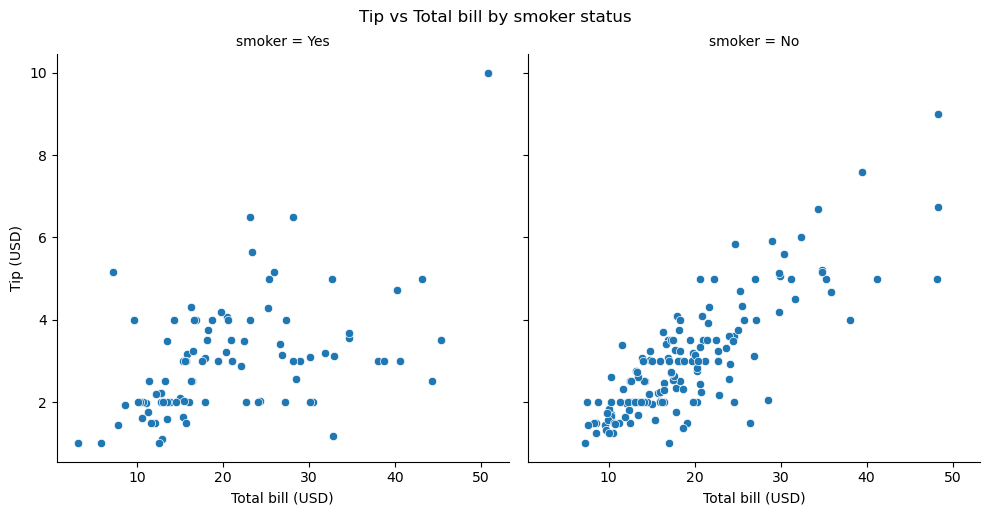

**Expected output (visual description):**

```
Two side-by-side facets (smoker == No, smoker == Yes) with:
- x label: "Total bill (USD)"
- y label: "Tip (USD)"
- A centered figure title: "Tip vs Total bill by smoker status"
```

**Line-by-line explanation**
1–3. imports & load.
4\. `g = sns.relplot(..., col="smoker")` — build FacetGrid.
5\. `g.set_axis_labels("Total bill (USD)", "Tip (USD)")`

* **What:** Sets axis labels for all facets.
* **Why:** Provide clearer, human-readable axis labels (units, meaning).
* **Expected result:** All facets show updated axis labels.

6. `g.fig.suptitle("...", y=1.02)`

   * **What:** Adds a single title for the whole figure; `y=1.02` nudges it above default location.
   * **Why:** `FacetGrid` uses multiple axes; a global title is often clearer than per-axis titles.
   * **Expected result:** Title appears above the facets.
7. `plt.show()` — render.

**Significance**

* Demonstrates how you can programmatically customize the returned FacetGrid.

---

# 15 — Quick reference: common `relplot()` arguments

* `x`, `y` — numeric variables to relate.
* `data` — DataFrame.
* `kind` — `"scatter"` (default relational scatter) or `"line"` (relational line plot).
* `col`, `row` — column/row faceting variable names.
* `col_wrap` — how many facet columns before wrapping to a new row.
* `col_order`, `row_order` — explicit ordering lists for categories.
* `hue` — color by category within each subplot (still possible with `relplot`).

---

# 16 — Practice exercises (suggested)

1. Recreate the `col="smoker", row="time"` grid and add `hue="sex"` to see how the relationship varies by gender within each facet.

   * Try: `sns.relplot(..., col="smoker", row="time", hue="sex", kind="scatter")`
2. Use `col_order` to display days in chronological order: `["Thur","Fri","Sat","Sun"]`.
3. Use `kind="line"` with `estimator="mean"` to visualize average tip by bill (after binning `total_bill`). (This previews the lineplot variant of `relplot` covered later.)

---

# 17 — Minimal troubleshooting & tips

* If your plot is empty or facets missing: check for typos in column names and check for NaNs in the faceting column.
* Use `tips['day'].unique()` (or `.value_counts()`) to see actual category labels before using `col_order`.
* `relplot` returns a `FacetGrid` — capture it if you plan to customize later.

---

# 18 — Full worked example (all together — copy/paste cell)

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Facet by day, wrap into 2 columns and set an explicit order
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="day",
    col_wrap=2,
    col_order=["Thur", "Fri", "Sat", "Sun"]
)

# Labels and title
g.set_axis_labels("Total bill (USD)", "Tip (USD)")
g.fig.suptitle("Tip vs Total bill by day of week", y=1.02)

plt.show()
```
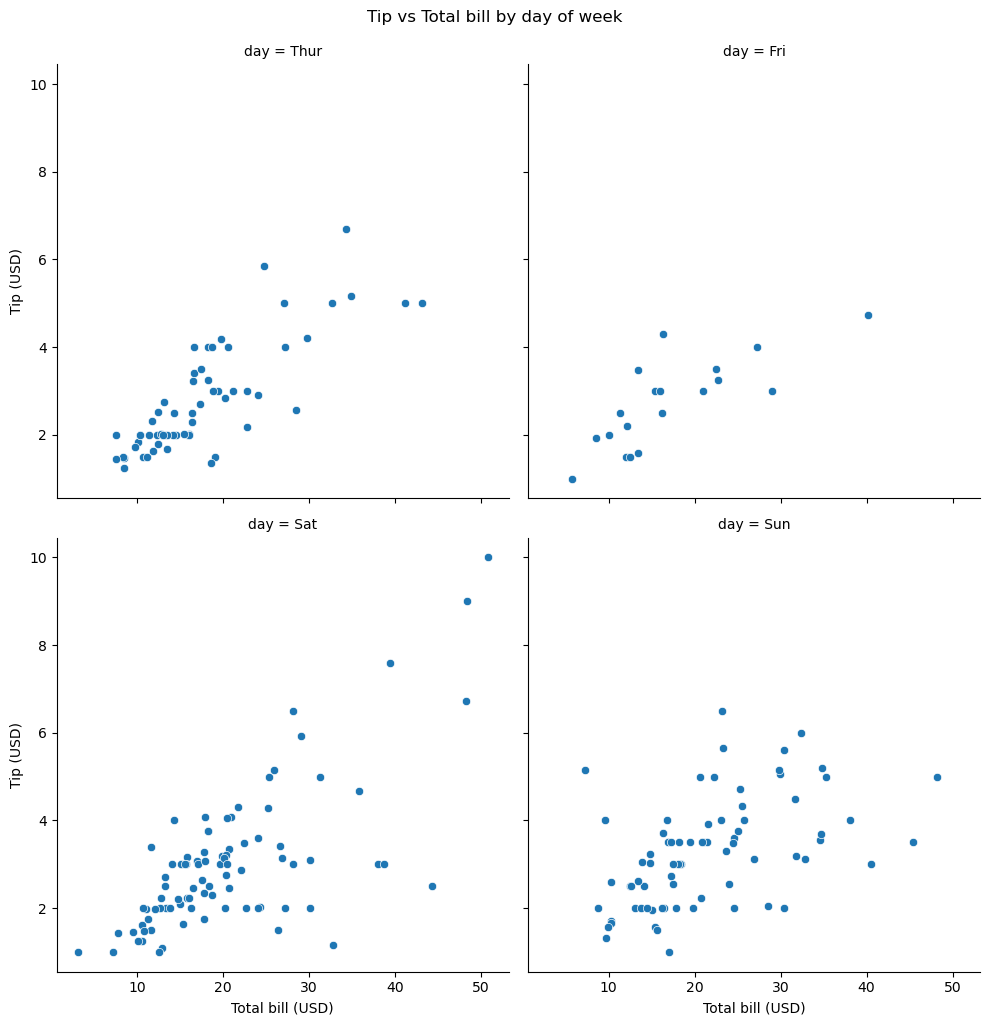

**Expected output (visual description):**

```
Four scatter subplots arranged in 2 columns by 2 rows:
Row1: Thur, Fri
Row2: Sat, Sun
Each subplot: scatter of total_bill vs tip for that day, with axis labels and a centered figure title.
```

**Line-by-line explanation**

1. `import seaborn as sns` — import Seaborn.
2. `import matplotlib.pyplot as plt` — import pyplot.
3. `tips = sns.load_dataset("tips")` — load example data.
4. `g = sns.relplot(...)`

   * **What:** Create a FacetGrid of scatterplots faceted by `day`.
   * **Why:** Compare tip vs bill relationships across days.
   * **Expected result:** `g` holds the multi-plot figure.
5. `g.set_axis_labels("Total bill (USD)", "Tip (USD)")` — set labels for each facet.
6. `g.fig.suptitle("...", y=1.02)` — add a top-level title; `y` nudges it up.
7. `plt.show()` — display the figure.

---

# 19 — Short recap (one-liner)

* Use `sns.relplot(kind="scatter")` to create relational scatter plots that can be easily faceted with `col`, `row`, `col_wrap`, and ordered with `col_order`/`row_order`. Use `scatterplot()` for a quick single-axes plot; prefer `relplot()` when you want small multiples / subplots per subgroup.

---


### Exercise
Creating subplots with col and row
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

Seaborn has been imported as sns and matplotlib.pyplot has been imported as plt.

1. Modify the code to use relplot() instead of scatterplot().
```python
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3", 
                data=student_data, kind='scatter')

# Show plot
plt.show()
```
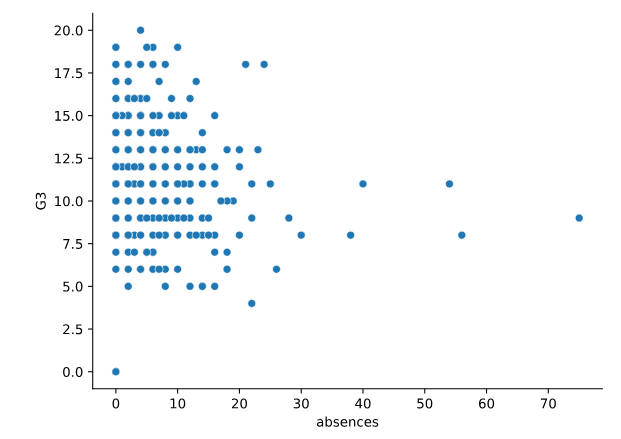

2. Modify the code to create one scatter plot for each level of the variable "study_time", arranged in columns.
```python
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", col='study_time')

# Show plot
plt.show()
```
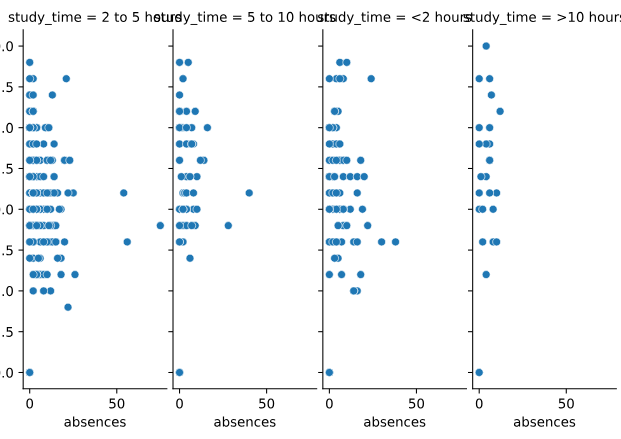


3. Adapt your code to create one scatter plot for each level of a student's weekly study time, this time arranged in rows.
```python

# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Show plot
plt.show()
```

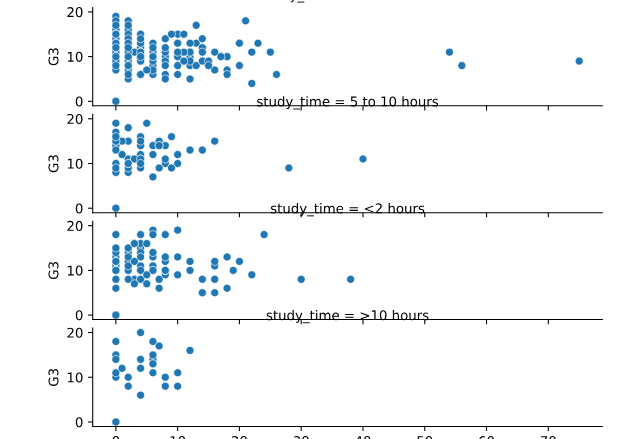

### Exercise
Creating two-factor subplots
Let's continue looking at the student_data dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

Seaborn has been imported as sns and matplotlib.pyplot has been imported as plt.

1. Use relplot() to create a scatter plot with "G1" on the x-axis and "G3" on the y-axis, using the student_data DataFrame.

```python
# Create a scatter plot of G1 vs. G3
sns.relplot(x='G1', y='G3', kind='scatter', data=student_data)

# Show plot
plt.show()
```
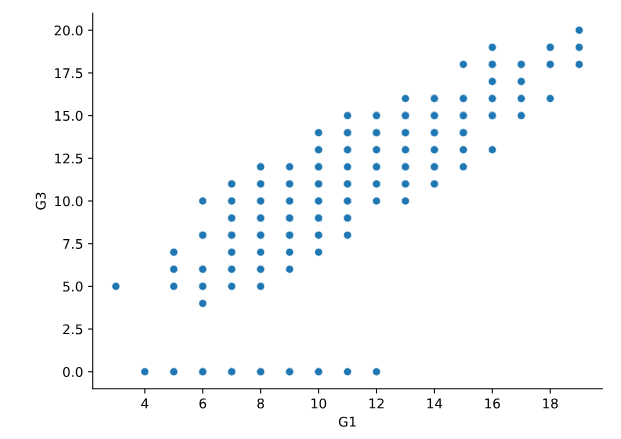

2. Create column subplots based on whether the student received support from the school ("schoolsup"), ordered so that "yes" comes before "no".

```python
# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter",
            col='schoolsup',
            col_order =['yes', 'no']
        )

# Show plot
plt.show()
```
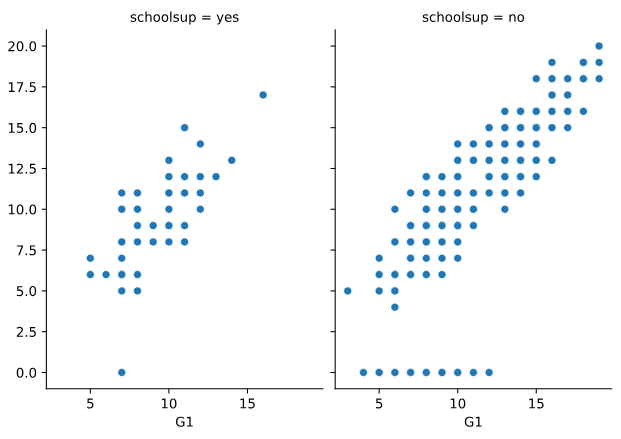


3. Add row subplots based on whether the student received support from the family ("famsup"), ordered so that "yes" comes before "no". This will result in subplots based on two factors.

```python
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row='famsup',
            row_order=['yes', 'no'])

# Show plot
plt.show()
```
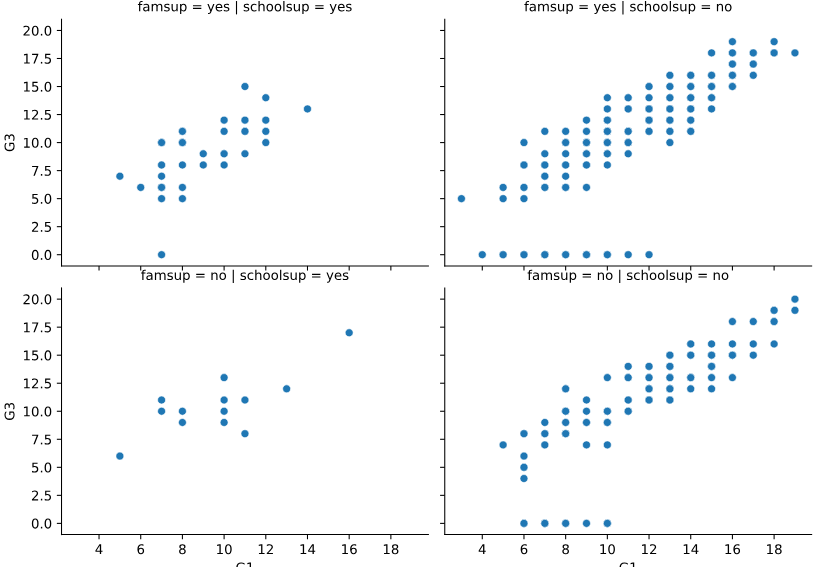

# Customizing Scatterplots with Seaborn

---

## 1. Introduction

- Scatter plots help visualize the relationship between **two quantitative variables**.
- Seaborn allows customization to add more information to scatter plots:
  - **Subplots**: using `row` and `col` parameters.
  - **Subgroups with color**: using `hue`.
  - **Subgroups with point size**: using `size`.
  - **Subgroups with point style**: using `style`.
  - **Point transparency**: using `alpha`.
- Both `scatterplot()` and `relplot()` can be used, but `relplot()` is more flexible for subplots.
- We'll use the **`tips` dataset** throughout this lesson.

---

## 2. Scatter Plot Overview

- Scatter plots are used to **show relationships** between numeric variables.
- Customizations help add extra information:
  - **Subplots** (row/column)
  - **Color** (hue)
  - **Size**
  - **Style**
  - **Transparency**
- Example: Visualizing `total_bill` vs `tip` in the `tips` dataset.

---

## 3. Subgroups with Point Size

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with point size based on 'size' column
sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    size="size"
)
plt.show()
````
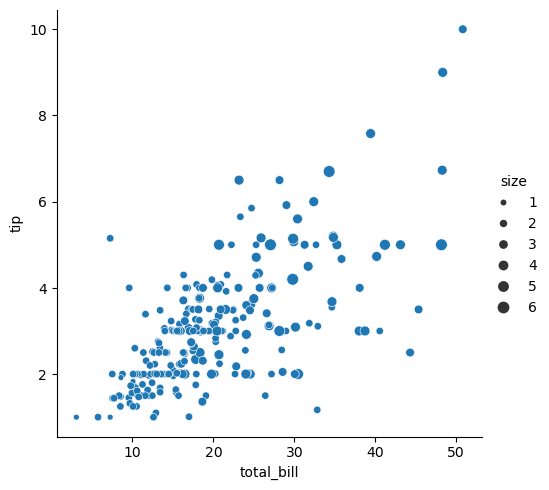


**Output Example:**

```
A scatter plot of total_bill vs tip.
- Each point represents a bill.
- Points are sized according to the 'size' of the dining group.
```

**Line-by-Line Explanation:**

1. `import seaborn as sns`

   * Imports the Seaborn library for statistical data visualization.
2. `import matplotlib.pyplot as plt`

   * Imports Matplotlib for controlling plot display.
3. `sns.relplot(...)`

   * Creates a scatter plot with `x="total_bill"` and `y="tip"`.
   * `data=tips`: uses the tips dataset.
   * `kind="scatter"`: specifies a scatter plot.
   * `size="size"`: sets the point size proportional to the number of people in the group.
4. `plt.show()`

   * Displays the plot.

**Significance:**

* Larger dining groups have bigger points, visually representing group size.
* Best for quantitative or ordinal variables.
* Can be hard to read if all points are the same color.

---

## 4. Point Size and Hue

```python
sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    size="size",
    hue="size"
)
plt.show()
```
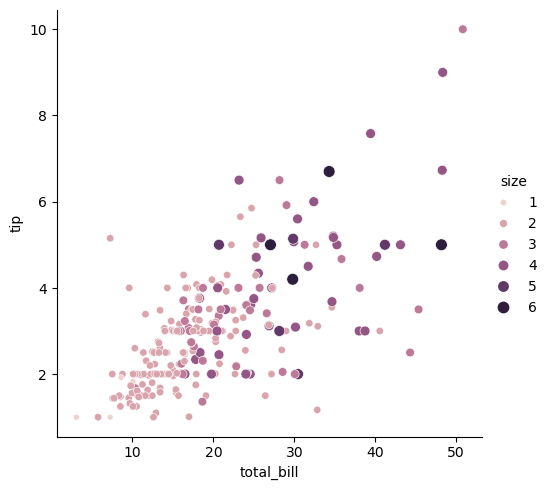

**Output Example:**

```
A scatter plot of total_bill vs tip.
- Point size varies by group size.
- Point color also varies by group size (darker for larger groups).
```

**Explanation:**

1. `hue="size"`

   * Adds color variation based on the `size` variable.
   * Larger groups appear darker; smaller groups lighter.
2. Combines size and color to **enhance readability**.
3. Helps highlight patterns in quantitative variables more clearly.

**Significance:**

* Improves contrast between points.
* Makes it easier to distinguish different group sizes visually.

---

## 5. Subgroups with Point Style

```python
sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    hue="smoker",
    style="smoker"
)
plt.show()
```
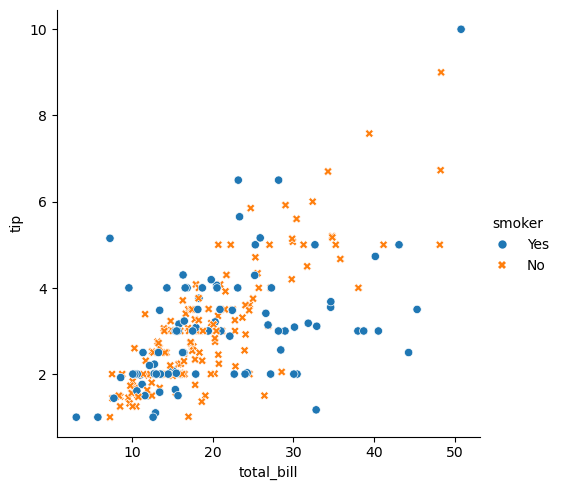


**Output Example:**

```
A scatter plot of total_bill vs tip.
- Points colored by 'smoker' status.
- Different point styles (circle, square) indicate smoker vs non-smoker.
```

**Explanation:**

1. `hue="smoker"`

   * Colors points based on smoking status.
2. `style="smoker"`

   * Changes point markers for different smoking categories.
3. Helps **distinguish subgroups visually** using both color and shape.

**Significance:**

* Makes categorical subgroups clear.
* Especially useful when color alone is insufficient for differentiation.

---

## 6. Changing Point Transparency

```python
sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    alpha=0.4
)
plt.show()
```
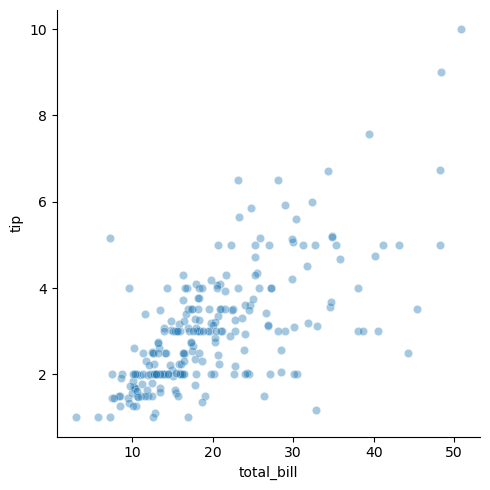

**Output Example:**

```
A scatter plot of total_bill vs tip.
- Points are semi-transparent.
- Areas with overlapping points appear darker.
```

**Explanation:**

1. `alpha=0.4`

   * Sets transparency of points (0 = fully transparent, 1 = fully opaque).
2. Helps **visualize density of overlapping points**.

**Significance:**

* Useful for large datasets with many overlapping points.
* Reveals areas with high concentration of observations.

---

## 7. Summary and Practice

* Seaborn scatter plots can be **customized with size, hue, style, and transparency**.
* Use **size** for quantitative or ordinal subgroups.
* Use **hue and style** to make categorical subgroups clearer.
* Use **alpha** to visualize overlapping points.
* `relplot()` is flexible and recommended for subplots and complex customizations.
* Practice by experimenting with these parameters on the `tips` dataset.

```
```


### Exercise
Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

Let's continue to use relplot() instead of scatterplot() since it offers more flexibility.

1. Use relplot() and the mpg DataFrame to create a scatter plot with "horsepower" on the x-axis and "mpg" on the y-axis. Vary the size of the points by the number of cylinders in the car ("cylinders").

```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of horsepower vs. mpg
sns.relplot(x='horsepower', y='mpg', data=mpg, size= 'cylinders', kind='scatter')

# Show plot
plt.show()
```
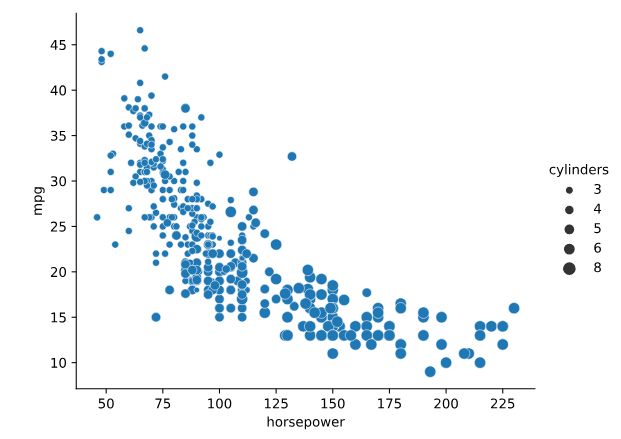

2. To make this plot easier to read, use hue to vary the color of the points by the number of cylinders in the car ("cylinders").

```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",
            hue='cylinders')

# Show plot
plt.show()
```
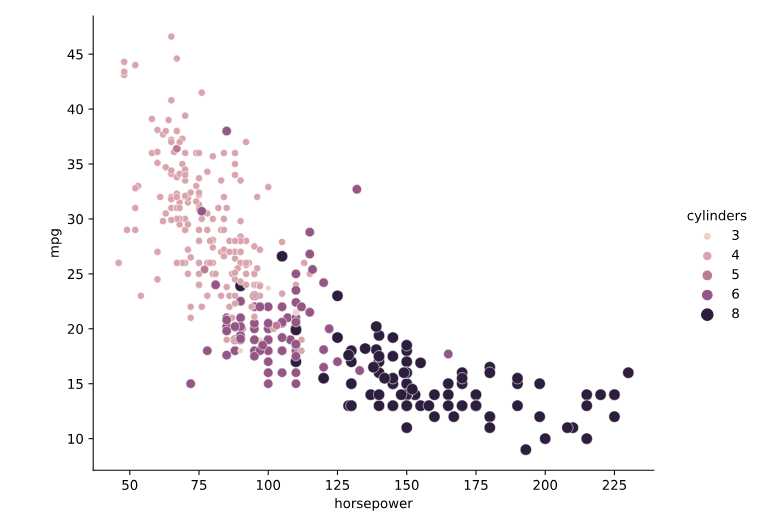

### Exercise
Changing the style of scatter plot points
Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Use relplot() and the mpg DataFrame to create a scatter plot with "acceleration" on the x-axis and "mpg" on the y-axis. Vary the style and color of the plot points by country of origin ("origin").

```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x= 'acceleration', y='mpg', data=mpg, style= 'origin', kind='scatter', hue ='origin')


# Show plot
plt.show()

```
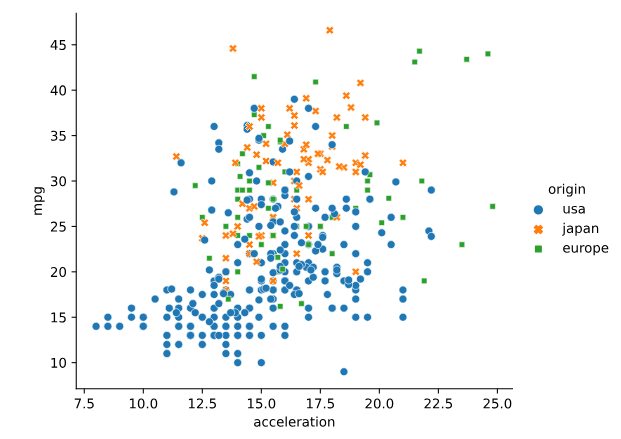



# Line Plots with Seaborn

---

## 1. Introduction to Line Plots

- Line plots are a type of **relational plot** in Seaborn.
- Unlike scatter plots (where each point is independent), line plots are ideal for **tracking the same variable over time**.
- Example use case: monitoring stock prices, air pollution levels, or any time-series data.

---

## 2. Air Pollution Dataset

- Dataset tracks **nitrogen dioxide (NO₂) levels** in a city.
- Multiple collection stations record NO₂ every hour.
- Key columns:
  - `hour`: Hour of the day (x-axis)
  - `NO_2_mean`: Average NO₂ across stations for that hour
  - `location`: Region of the station (North, South, East, West)
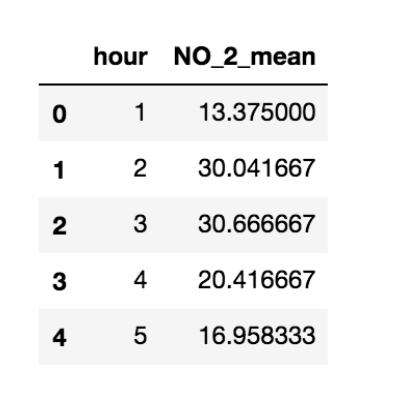
---

## 3. Scatter Plot for Single Observation per x-value

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: average NO₂ per hour
sns.relplot(
    x="hour",
    y="NO_2_mean",
    data=air_df_loc_mean,
    kind="scatter"
)
plt.show()
````
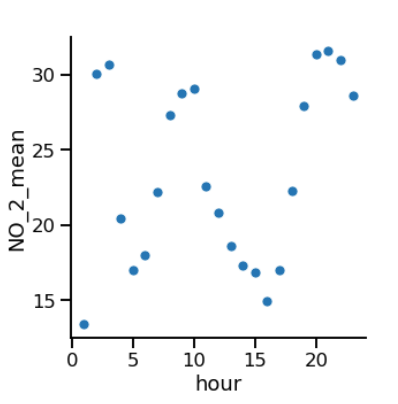


**Output Example:**

```
Scatter plot of average NO₂ (y-axis) vs hour (x-axis)
- Each point represents the mean NO₂ at that hour
```

**Explanation:**

1. `import matplotlib.pyplot as plt`

   * Import Matplotlib for plotting control.
2. `import seaborn as sns`

   * Import Seaborn for statistical plotting.
3. `sns.relplot(...)`

   * `x="hour"`, `y="NO_2_mean"`: plot hour vs mean NO₂.
   * `data=air_df_loc_mean`: uses dataset with one observation per hour.
   * `kind="scatter"`: creates a scatter plot.
4. `plt.show()`

   * Displays the plot.

**Significance:**

* Scatter plots show raw data points, but **line plots are better for trends over time**.

---

## 4. Basic Line Plot

```python
sns.relplot(
    x="hour",
    y="NO_2_mean",
    data=air_df_loc_mean,
    kind="line"
)
plt.show()
```
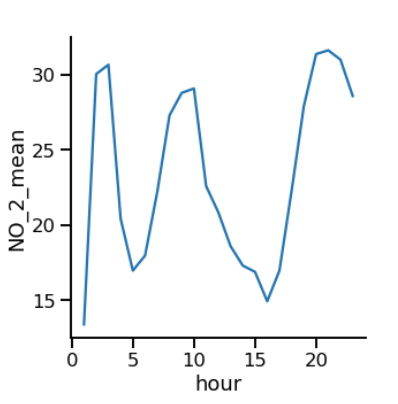

**Output Example:**

```
Line plot of NO₂ over hours
- Smooth line connecting NO₂ mean values
```

**Explanation:**

* `kind="line"`: switches from scatter to line plot.
* Highlights the **trend in NO₂ levels across hours**.

---

## 5. Subgroups by Location

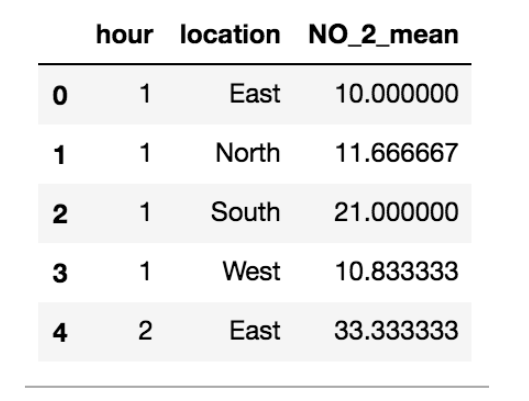

```python
sns.relplot(
    x="hour",
    y="NO_2_mean",
    data=air_df_loc_mean,
    kind="line",
    style="location",
    hue="location"
)
plt.show()
```
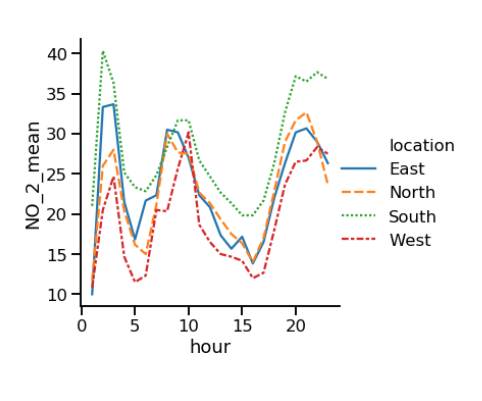


**Output Example:**

```
Line plot of NO₂ over hours
- Different lines for each location (North, South, East, West)
- Line style and color vary by location
```

**Explanation:**

1. `style="location"`: varies **line style** for each region.
2. `hue="location"`: varies **line color** for each region.
3. Highlights **regional differences** in NO₂ levels.

   * Example: South region has slightly higher NO₂ on average.

---

## 6. Adding Markers

```python
sns.relplot(
    x="hour",
    y="NO_2_mean",
    data=air_df_loc_mean,
    kind="line",
    style="location",
    hue="location",
    markers=True
)
plt.show()
```
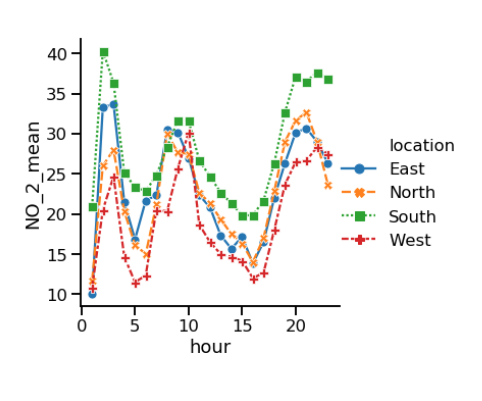

**Output Example:**

```
Line plot with markers for each hour
- Each line represents a location
- Marker indicates individual data points
```

**Explanation:**

* `markers=True`: adds markers at each data point.
* Makes **individual observations clearer** while retaining the trend line.

---

## 7. Turning Off Line Style Variation

```python
sns.relplot(
    x="hour",
    y="NO_2_mean",
    data=air_df_loc_mean,
    kind="line",
    style="location",
    hue="location",
    markers=True,
    dashes=False
)
plt.show()
```
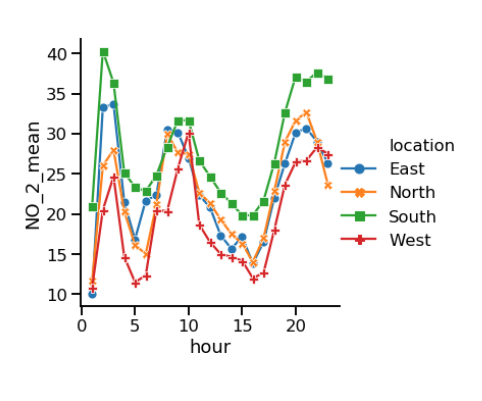

**Output Example:**

```
Line plot with markers
- All lines have solid style (no dashes)
- Colors still vary by location
```

**Explanation:**

* `dashes=False`: disables varying line styles for subgroups.
* Useful when **line style is not needed**, relying on color only.

---

## 8. Multiple Observations per x-value: Scatter Plot

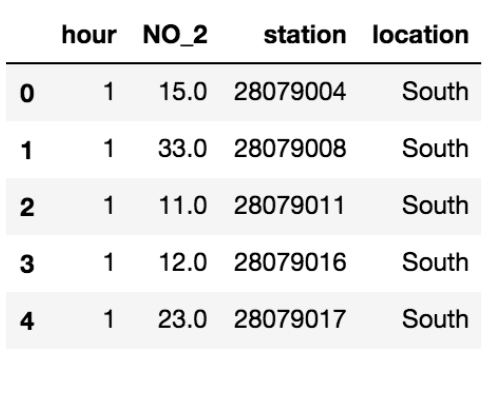

```python
sns.relplot(
    x="hour",
    y="NO_2",
    data=air_df,
    kind="scatter"
)
plt.show()
```
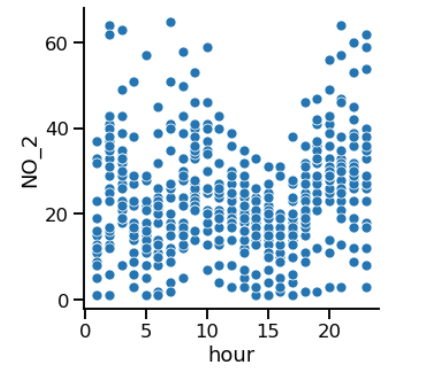

**Output Example:**

```
Scatter plot of all NO₂ measurements
- Multiple points per hour (one per station)
```

**Explanation:**

* `air_df` contains multiple observations per hour.
* Scatter plot shows **all individual measurements**.

---

## 9. Multiple Observations per x-value: Line Plot

```python
sns.relplot(
    x="hour",
    y="NO_2",
    data=air_df,
    kind="line"
)
plt.show()
```
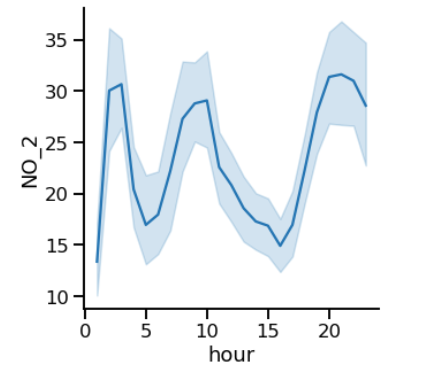


**Output Example:**

```
Line plot of NO₂ measurements
- Line represents mean NO₂ per hour
- Shaded area shows 95% confidence interval
```

**Explanation:**

* Seaborn **aggregates multiple observations** by default (mean).
* Shaded region = **confidence interval** (95% by default).
* CI shows **uncertainty in the estimate of the mean**.

---

## 10. Replacing Confidence Interval with Standard Deviation

```python
sns.relplot(
    x="hour",
    y="NO_2",
    data=air_df,
    kind="line",
    ci="sd"
)
plt.show()
```
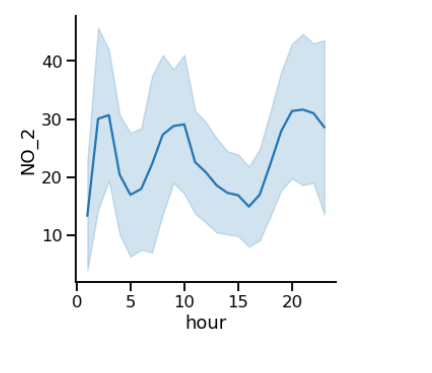

**Output Example:**

```
Line plot with shaded area = standard deviation
- Shows spread of NO₂ measurements per hour
```

**Explanation:**

* `ci="sd"`: shaded region now represents **standard deviation**.
* Visualizes **variability** rather than confidence in the mean.

---

## 11. Turning Off Confidence Interval

```python
sns.relplot(
    x="hour",
    y="NO_2",
    data=air_df,
    kind="line",
    ci=None
)
plt.show()
```
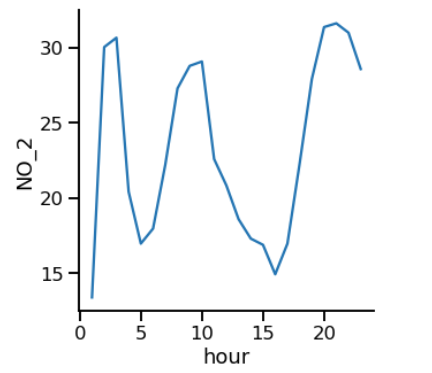

**Output Example:**

```
Line plot without shaded area
- Only the mean line is displayed
```

**Explanation:**

* `ci=None`: disables the confidence interval or shaded region.
* Useful for **cleaner plots** or when variability is not needed.

---

## 12. Summary

* **Line plots** visualize trends over time or ordered observations.
* **Subgroups** can be shown with `hue` (color) and `style` (line style).
* **Markers** improve visibility of individual data points.
* **Confidence intervals** help show uncertainty; can be replaced with **standard deviation** or turned off.
* Seaborn automatically **aggregates multiple observations** at the same x-value.
* Practice by experimenting with **`style`**, **`hue`**, **`markers`**, **`dashes`**, and **`ci`** parameters.

```
```


### Exercise
Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

Instructions 1/2
Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "mpg" on the y-axis.


```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot
sns.relplot(x='model_year', y='mpg',
            data=mpg,
            kind='line')

# Show plot
plt.show()
```
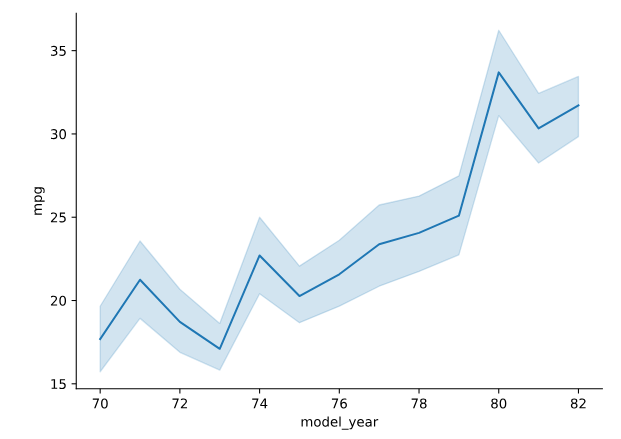

### Exercise
Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

Seaborn has been imported as sns and matplotlib.pyplot has been imported as plt.

Instructions
Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.

```python
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci='sd')

# Show plot
plt.show()
```
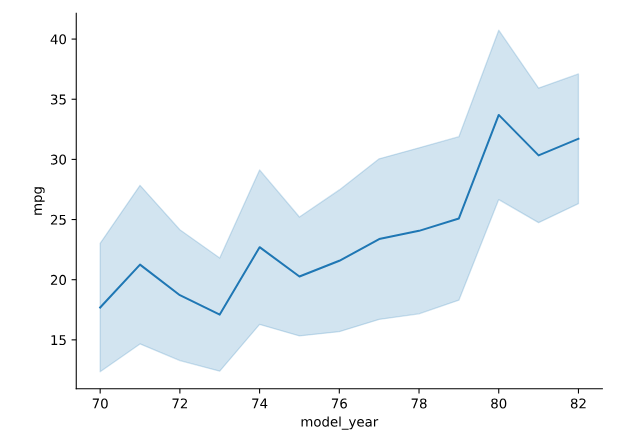

### Exercise
Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

Instructions 1/3

Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "horsepower" on the y-axis. Turn off the confidence intervals on the plot.

```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot of model year vs. horsepower
sns.relplot(x='model_year', y='horsepower',
            kind= 'line', data=mpg, ci=None)

# Show plot
plt.show()
```
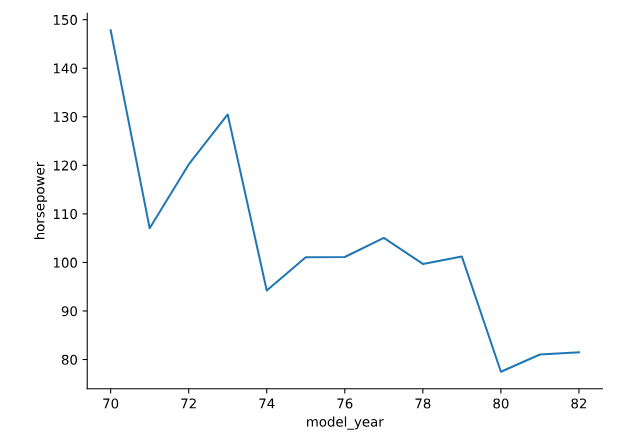

2. Create different lines for each country of origin ("origin") that vary in both line style and color.


```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin")

# Show plot
plt.show()

```

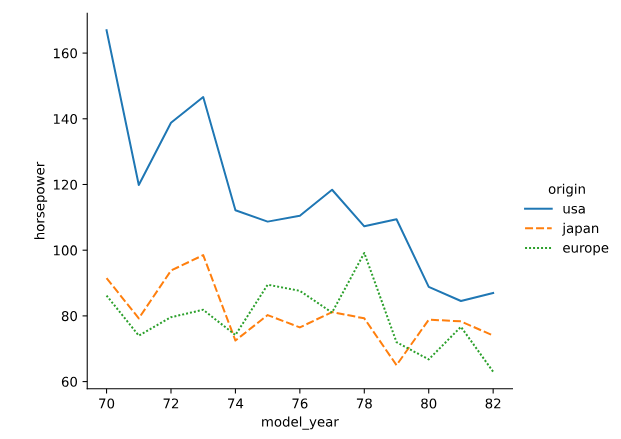

3. Add markers for each data point to the lines.
Use the dashes parameter to use solid lines for all countries, while still allowing for different marker styles for each line.

```python
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True,
            dashes=False)

# Show plot
plt.show()

```
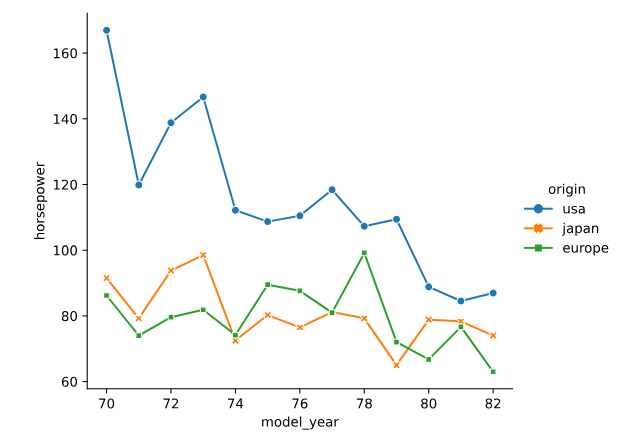